In [1]:
import pandas as pd
pd.options.display.max_colwidth = 100
from tqdm import tqdm
import numpy as np
import numba
from numba import njit

import strax
import straxen

In [3]:
channels = np.arange(494)

In [4]:
from contextlib import contextmanager
@contextmanager
def initiate_plot(dimx=24, dimy=9):
    plt.rcParams['figure.figsize'] = (dimx, dimy)
    global fig; fig = plt.figure()
    yield
    plt.show()

In [5]:
run_id_signal = '007340' ## 5.0 V
run_id_noise  = '007341'

In [6]:
f_signal = !ls out_file/*7340*

In [7]:
f_bg = !ls out_file/*7341*

In [8]:
n_file = len(f_bg)

In [9]:
Et = np.zeros(len(channels))
Eb = np.zeros(len(channels))

Vt = np.zeros(len(channels))
Vb = np.zeros(len(channels))

In [10]:
ch_ini = !ls out_file/*7340* | sed -e "s/_/ /g" | awk '{print $4}'
ch_end = !ls out_file/*7340* | sed -e "s/_/ /g" | awk '{print $5}'

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

h_signal, h_bg = {},{}

In [12]:
test_f = np.load(f_signal[0])
test_b = np.load(f_bg[0])

n_sig = len(test_f[test_f['channel']==0]['area'])
n_bg  = len(test_b[test_b['channel']==0]['area'])

In [13]:
print(n_sig, n_bg)

n_load = min(n_sig, n_bg)
n_load

313986 275010


275010

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-package

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-package

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-package

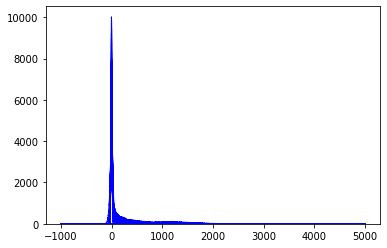

In [14]:
for i in range(0, n_file):
    
    f_sig = np.load(f_signal[i])
    
    ch_list = np.arange(int(ch_ini[i]), int(ch_end[i]))

    for j, val in enumerate(ch_list):
        
        signal_from_pmt = f_sig[f_sig['channel']==val]
        signal_from_pmt = signal_from_pmt[:n_load]
        
        ##print(f_signal[i], val, np.mean(signal_from_pmt['area'], axis=0))
        Et[val] = np.mean(signal_from_pmt['area'], axis=0)
        Vt[val] = np.var(signal_from_pmt['area'], axis=0)
        
        h_signal[val], bins, patches = plt.hist(signal_from_pmt['area'], bins=6000, range=[-1000,5000],
                                                histtype='step', color='b', label='Signal')
        
        #print(val, np.mean(h_signal[val]))
        del signal_from_pmt
    
    del f_sig

In [15]:
print(Et)
len(Et)
Et = np.nan_to_num(Et)

[ 1.83794841e+02  6.39671882e+01  2.88039374e+01  2.29518128e+01
  3.97491359e+01  5.90914646e+00  1.23163414e+02  1.85326620e+02
  1.27839492e+02  7.15516595e+01  7.63553908e+01  4.68692159e+01
  1.75711710e+01  6.22134755e+01  5.14396538e+01  6.80256233e+00
  6.15242995e+01  5.17622346e+01  4.25516676e+01  3.53725418e+01
  7.32117644e+01  2.40660506e+01  4.72609278e+01  4.81240236e+01
  3.86315225e+01  6.25696440e+01  3.83354083e+01  6.63261595e+01
  1.41745126e+01  2.16396106e+01  4.28179520e+01  5.17483864e+01
  4.30979686e+01  1.88301399e+01  3.80033439e+01  3.97611138e+01
  6.78512952e+01  6.89678304e+01  7.56103759e+01  5.01698484e+01
  2.88777364e+01  4.74730106e+01  2.97403652e+01  2.63076792e+01
  3.09521230e+01  3.69909901e+01  3.75099001e+01  5.62870563e+01
  3.47320786e+01  3.13841075e+01  5.97369620e+01  5.08468696e+01
  4.94497696e+01  6.86024862e+01  5.17625403e+01  2.49040462e+01
  4.51304510e+01  3.40620959e+01             nan  7.54225435e+01
             nan  1.69108

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-package

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-package

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-package

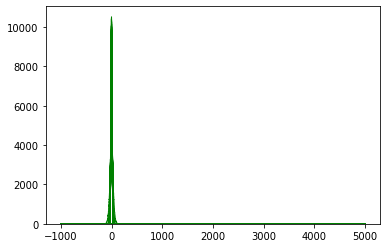

In [16]:
for i in range(0, n_file):
    
    f_BG = np.load(f_bg[i])
    
    ch_list = np.arange(int(ch_ini[i]), int(ch_end[i]))

    for j, val in enumerate(ch_list):
        
        bg_from_pmt = f_BG[f_BG['channel']==val]
        bg_from_pmt = bg_from_pmt[:n_load]

        Eb[val] = np.mean(bg_from_pmt['area'], axis=0)
        Vb[val] = np.var(bg_from_pmt['area'], axis=0)

        
        h_bg[val], bins, patches = plt.hist(bg_from_pmt['area'], bins=6000, range=[-1000,5000],
                                            histtype='step', color='g', label='Noise')
            
        del bg_from_pmt
    
    del f_BG

In [17]:
print(Eb)
len(Eb)
Eb = np.nan_to_num(Eb)

[ 4.75044544e-02  2.12559543e-02 -1.53438057e-02  1.20796820e-02
  6.74946366e-02 -4.02224162e-02 -4.60002667e-02  6.40924572e-02
  2.25197872e-02 -6.89371296e-02  6.31577034e-03  2.33465450e-02
 -5.74948790e-03  3.26539641e-02  2.62688630e-02 -1.63122553e-02
 -7.86419888e-03 -2.19187181e-02 -1.13182551e-02  1.51158140e-02
 -3.52047804e-03 -5.65121268e-02 -3.16595760e-02 -3.13863738e-02
 -6.55869484e-02  3.89682799e-04 -3.91542126e-02 -3.55868271e-02
 -5.59697223e-02 -3.57088833e-02 -1.14517048e-02  2.28621990e-02
 -1.70211992e-03  4.03693199e-02 -2.05379198e-02 -6.18548416e-02
  5.73279760e-02 -2.75963298e-02 -6.12044411e-02  2.29271663e-02
 -6.21922839e-02  7.96483764e-02  1.31499461e-02  1.25631795e-02
 -9.75964510e-04  6.35552647e-03  3.91276681e-02  9.91127595e-03
 -6.22728870e-02  1.36106566e-02  7.49398204e-02 -8.08083342e-02
  4.21851327e-02 -4.78394725e-02 -1.57294159e-01 -5.93415997e-02
  5.81797026e-04 -2.82782444e-02             nan -1.79102578e-02
             nan  3.42946

In [18]:
# E_b value should be ~0 because it's just a noise
print(np.mean(Et), np.mean(Eb))

37.02116309351725 -0.010403266160214713


In [19]:
Et

array([ 1.83794841e+02,  6.39671882e+01,  2.88039374e+01,  2.29518128e+01,
        3.97491359e+01,  5.90914646e+00,  1.23163414e+02,  1.85326620e+02,
        1.27839492e+02,  7.15516595e+01,  7.63553908e+01,  4.68692159e+01,
        1.75711710e+01,  6.22134755e+01,  5.14396538e+01,  6.80256233e+00,
        6.15242995e+01,  5.17622346e+01,  4.25516676e+01,  3.53725418e+01,
        7.32117644e+01,  2.40660506e+01,  4.72609278e+01,  4.81240236e+01,
        3.86315225e+01,  6.25696440e+01,  3.83354083e+01,  6.63261595e+01,
        1.41745126e+01,  2.16396106e+01,  4.28179520e+01,  5.17483864e+01,
        4.30979686e+01,  1.88301399e+01,  3.80033439e+01,  3.97611138e+01,
        6.78512952e+01,  6.89678304e+01,  7.56103759e+01,  5.01698484e+01,
        2.88777364e+01,  4.74730106e+01,  2.97403652e+01,  2.63076792e+01,
        3.09521230e+01,  3.69909901e+01,  3.75099001e+01,  5.62870563e+01,
        3.47320786e+01,  3.13841075e+01,  5.97369620e+01,  5.08468696e+01,
        4.94497696e+01,  

In [20]:
Eb

array([ 4.75044544e-02,  2.12559543e-02, -1.53438057e-02,  1.20796820e-02,
        6.74946366e-02, -4.02224162e-02, -4.60002667e-02,  6.40924572e-02,
        2.25197872e-02, -6.89371296e-02,  6.31577034e-03,  2.33465450e-02,
       -5.74948790e-03,  3.26539641e-02,  2.62688630e-02, -1.63122553e-02,
       -7.86419888e-03, -2.19187181e-02, -1.13182551e-02,  1.51158140e-02,
       -3.52047804e-03, -5.65121268e-02, -3.16595760e-02, -3.13863738e-02,
       -6.55869484e-02,  3.89682799e-04, -3.91542126e-02, -3.55868271e-02,
       -5.59697223e-02, -3.57088833e-02, -1.14517048e-02,  2.28621990e-02,
       -1.70211992e-03,  4.03693199e-02, -2.05379198e-02, -6.18548416e-02,
        5.73279760e-02, -2.75963298e-02, -6.12044411e-02,  2.29271663e-02,
       -6.21922839e-02,  7.96483764e-02,  1.31499461e-02,  1.25631795e-02,
       -9.75964510e-04,  6.35552647e-03,  3.91276681e-02,  9.91127595e-03,
       -6.22728870e-02,  1.36106566e-02,  7.49398204e-02, -8.08083342e-02,
        4.21851327e-02, -

In [21]:
E_t, E_b, V_t, V_b = [],[],[],[]
mids = 0.5*(bins[1:] + bins[:-1])

for i, val in enumerate(channels):

    mean_t = 0
    mean_b = 0
    std_t = 0
    std_b = 0
    
    if Et[i] !=0:
        mean_t = np.average(mids, weights=h_signal[i])
        mean_b = np.average(mids, weights=h_bg[i])
        std_t = np.average((mids - mean_t)**2, weights=h_signal[i])
        std_b = np.average((mids - mean_b)**2, weights=h_bg[i])
    
    E_t.append(mean_t)
    E_b.append(mean_b)
    V_t.append(std_t)
    V_b.append(std_t)

In [22]:
print(np.mean(E_t), np.mean(E_b))

37.035510666450534 0.005274654713237386


In [23]:
import scipy
from scipy.signal import savgol_filter

def calc_occupancy(channel, signal, bg, bins, E_t, order):

    if E_t[channel] > 0:
        threshold = -35
    else:
        threshold = 0

    ini_threshold = threshold    
    end_threshold = 50
    start = np.digitize(-1000, bins)
    
    occupancy = []
    occupancy_err = []
    thr = []
    
    tot_entries_b = np.cumsum(bg[channel])[-1]
    
    while threshold < end_threshold: 
        bin_threshold = np.digitize(threshold, bins)
        
        Ab = np.cumsum(bg[channel][start:bin_threshold])[-1]
        As = np.cumsum(signal[channel][start:bin_threshold])[-1]
        
        if Ab > 0 and As > 0:
            f = Ab/tot_entries_b
            l = -np.log(As/Ab)
            l_err = np.sqrt((np.exp(l) + 1. - 2.*(Ab/tot_entries_b))/Ab)
            #print(channel, channels[channel], threshold, l, l_err)
            
            #print(channel, threshold, l, l_err/l)
            #if l_err/l <= 0.05:
            occupancy.append(l)
            occupancy_err.append(l_err)
            thr.append(threshold)
        threshold += 1

    #num = np.absolute(ini_threshold-end_threshold) - 1
    num = len(occupancy) - 1
    if num % 2 == 0:
        num = num -1
    
    #if order < num:
    #    order = num - 1
    
    occupancy_smooth = scipy.signal.savgol_filter(occupancy, num, order)

    dummy = occupancy_smooth.argsort()[::-1]

    for idx in range(0, len(dummy)):
        #print(channel, occupancy_err[dummy[0]], occupancy_err[dummy[1]])
        if occupancy_err[dummy[idx]]/occupancy[dummy[idx]] < 0.03:
            estimated_occupancy = occupancy[dummy[idx]]
            estimated_occupancy_err = occupancy_err[dummy[idx]]
            itr = dummy[idx]
            break
        else:
            estimated_occupancy = 0
            estimated_occupancy_err = 0
            itr = 0

    #estimated_occupancy = np.max(occupancy_smooth)
        
    #itr = np.argmax(occupancy_smooth)
    #estimated_occupancy_err = np.power((estimated_occupancy-occupancy[itr])**2 + occupancy_err[itr]**2, 0.5)
    #print(channel, estimated_occupancy, estimated_occupancy_err)
    return estimated_occupancy, estimated_occupancy_err, itr, occupancy, occupancy_err, thr, occupancy_smooth, f, tot_entries_b

In [80]:
occupancy = []
occupancy_err = []

Lambda = []
Lambda_err = []
Lambda_smooth = []

Iterator = []
Threshold = []

tot_N = []
f_b = []

order = 7

Et_thr = 1.

for i, val in enumerate(channels):

    if E_t[i] > Et_thr:
        calc_L, calc_L_err, itr, occu, occu_err, thr, occupancy_smooth, fb, totN = calc_occupancy(i, h_signal, h_bg, bins, E_t, order)
        occupancy.append(calc_L)
        occupancy_err.append(calc_L_err)
        Lambda.append(occu)
        Lambda_err.append(occu_err)
        Lambda_smooth.append(occupancy_smooth)
        Threshold.append(thr)
        Iterator.append(itr)
        f_b.append(fb)
        tot_N.append(totN)
    if E_t[i] <= Et_thr:
        occupancy.append(0)
        occupancy_err.append(0)
        Lambda.append(0)
        Lambda_err.append(0)
        Lambda_smooth.append(0)
        Threshold.append(0)
        Iterator.append(0)
        f_b.append(0)
        tot_N.append(0)

In [97]:
num=183
print(E_t[num], occupancy[num])

433.3299734555107 0.4378255791662051


In [81]:
def plot_lambda_vs_threshold(itr): # itr = index number
    
    plt.rcParams['figure.figsize'] = (10, 5)

    plt.errorbar(Threshold[itr], Lambda[itr], yerr=Lambda_err[itr], linestyle = '', fmt='o', markersize=5,
             color='royalblue', label='Lambda vs threshold')

    plt.errorbar(Threshold[itr], Lambda_smooth[itr], yerr=0, linestyle = '-', fmt='', linewidth=3,
             color='red', label='Lambda vs threshold with savgol_filter')
    
    ymax = max(Lambda[itr])
    ymin = min(Lambda[itr])

    xmax = Threshold[itr][Iterator[itr]]

    plt.xlabel('Threshold [ADC]')
    plt.ylabel('Occupancy [PE/trigger]')
    
    ax_xmin, ax_xmax, ax_ymin, ax_ymax = plt.axis()    
    plt.ylim(ymin*0.9, ymax*1.1)
    plt.plot([ax_xmin, ax_xmax],[occupancy[itr], occupancy[itr]], "green", linestyle='dashed', label='estimated occupancy for nT') # normal way

    #plt.plot([xmax, xmax],[ax_ymin, ax_ymax], "green", linestyle='dashed', label='estimated occupancy for nT') # normal way
    plt.legend(loc='lower right')

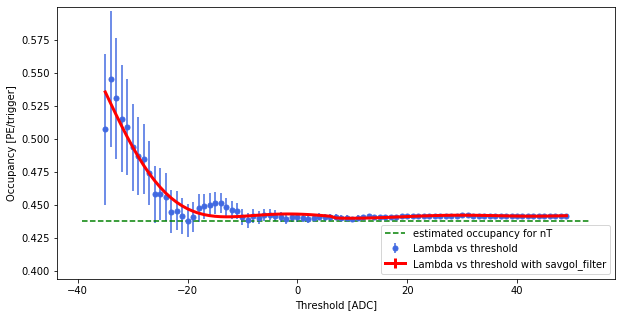

In [82]:
plot_lambda_vs_threshold(183)

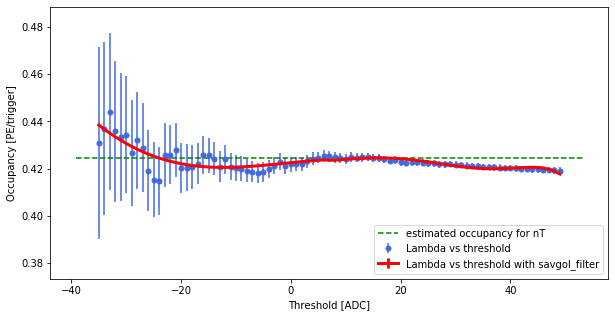

In [98]:
plot_lambda_vs_threshold(0)

In [85]:
def convert_to_gain(mu):
    Z = 50
    A = 10
    e = 1.6021766208e-19
    f = 1e8
    r = 2.25/16384
    
    gain = mu*r/(Z*A*f*e*1e6)
    
    return gain

In [86]:
Gain = []
Gain_err = []

for i, val in enumerate(channels):

    gain = 0.
    gain_err = 0.
    if E_t[i] > Et_thr:
        EPsi = (E_t[i] - E_b[i])/occupancy[i]
        VPsi = (V_t[i] - V_b[i])/occupancy[i] - EPsi*EPsi
        EPsi_stat_err = (occupancy[i]*(EPsi*EPsi + VPsi) + 2.*V_b[i])/(tot_N[i]*occupancy[i]*occupancy[i]) + (EPsi*EPsi*(np.exp(occupancy[i]) + 1. - 2.*f_b[i]))/(f_b[i]*tot_N[i]*occupancy[i]*occupancy[i])
        EPsi_sys_err = (E_t[i] - E_b[i])*occupancy_err[i]/(occupancy[i]**2)

        gain = convert_to_gain(EPsi)
        gain_err = convert_to_gain(np.sqrt(EPsi_stat_err)) + convert_to_gain(EPsi_sys_err)

    Gain.append(gain)
    Gain_err.append(gain_err)

In [87]:
Gain = np.array(Gain)
Gain_err = np.array(Gain_err)

occupancy = np.array(occupancy)
occupancy_err = np.array(occupancy_err)



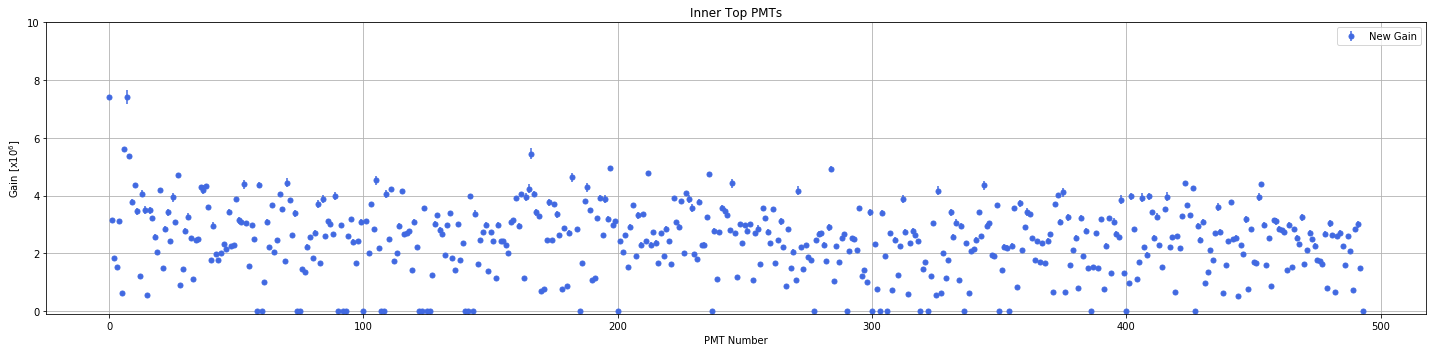

In [88]:
with initiate_plot(20, 5):
    plt.errorbar(channels, Gain, yerr=Gain_err, linestyle = '', fmt='o', markersize=5,
                color='royalblue', label='New Gain')
    plt.title('Inner Top PMTs')
    plt.xlabel('PMT Number')
    plt.ylabel('Gain [x10$^6$]')
    plt.ylim(-0.1,10)
    #plt.xlim(36,128)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("gain_vs_PMT.png")

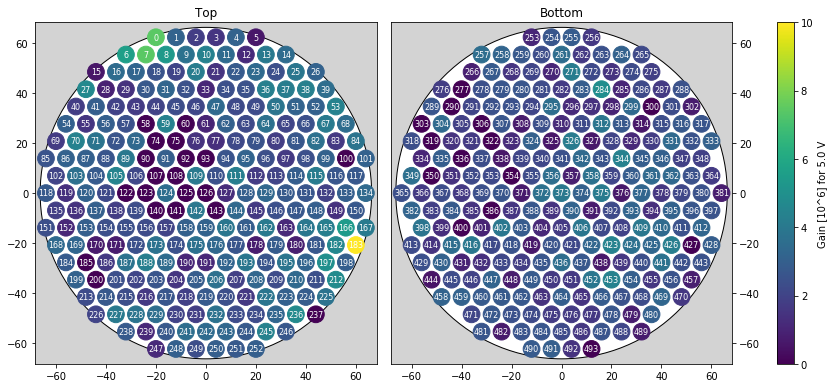

In [102]:
straxen.plot_pmts(Gain, vmin=0,vmax=10, label="Gain [10^6] for 5.0 V")

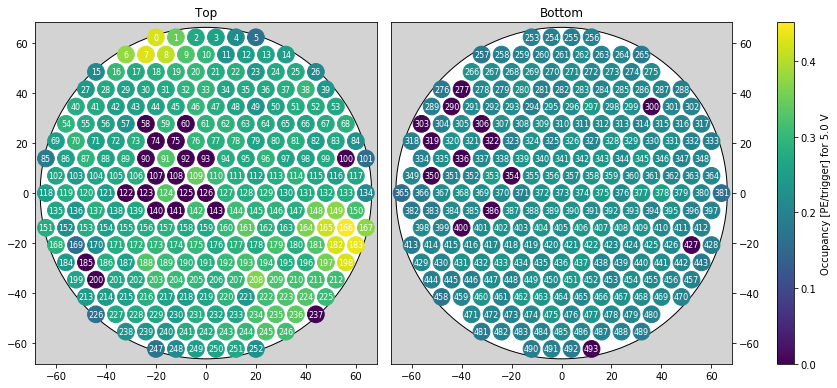

In [92]:
straxen.plot_pmts(occupancy, label="Occupancy [PE/trigger] for 5.0 V")

In [103]:
import pandas as pd

In [104]:
df= pd.DataFrame({
    'gain': Gain,
    'gain_err': Gain_err,
    'occupancy': occupancy,
    'occupancy_err': occupancy_err,
    'LED_voltage': 5.0
                 })

In [105]:
df

,gain,gain_err,occupancy,occupancy_err,LED_voltage
0,7.424014,0.071333,0.424289,0.001720,5.0
1,3.162426,0.042305,0.346631,0.002447,5.0
2,1.830873,0.053209,0.269826,0.005889,5.0
3,1.526571,0.027457,0.257601,0.002724,5.0
4,3.125630,0.049868,0.217632,0.001752,5.0
...,...,...,...,...,...
489,0.722294,0.028421,0.187213,0.005529,5.0
490,2.835405,0.064637,0.186477,0.002657,5.0
491,2.998913,0.114694,0.199757,0.005975,5.0
492,1.470910,0.030701,0.184783,0.002242,5.0


In [106]:
df.to_hdf('table_5.0V.h5', key='table', mode='w')

In [107]:
df1 = pd.read_hdf('table_4.8V.h5', 'table')
df2 = pd.read_hdf('table_5.0V.h5', 'table')

In [126]:
gain_diff = df2['gain'] - df1['gain']

In [137]:
gain_diff_err = np.power(df1['gain_err']**2 + df2['gain_err']**2, 0.5)

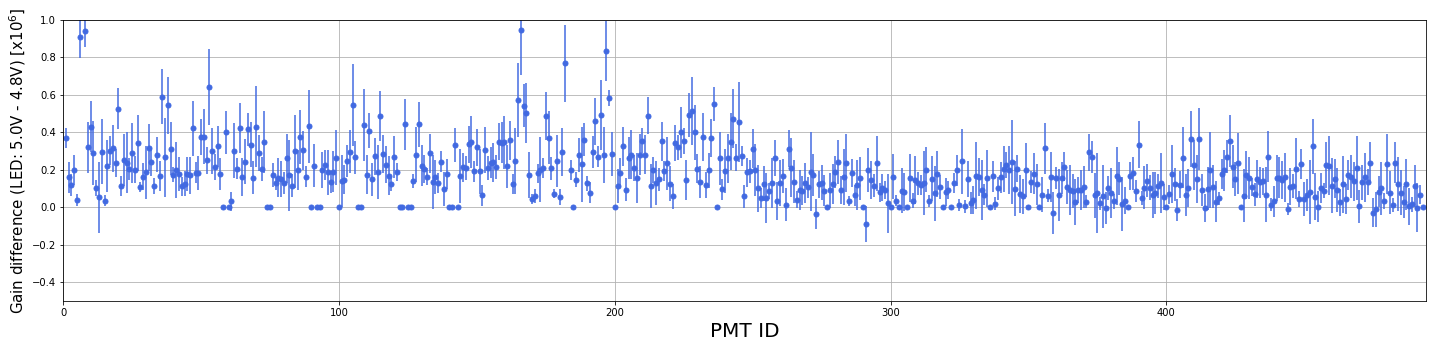

In [141]:
with initiate_plot(20, 5):
    plt.errorbar(channels, gain_diff, yerr=gain_diff_err, linestyle = '', fmt='o', markersize=5,
                color='royalblue', label='New Gain')
    #plt.title('Inner Top PMTs')
    plt.xlabel('PMT ID', fontsize=20)
    plt.ylabel('Gain difference (LED: 5.0V - 4.8V) [x10$^6$]', fontsize=15)
    plt.ylim(-0.5,1)
    plt.xlim(0,494)
    #plt.legend()
    plt.grid()
    plt.tight_layout()
    #plt.savefig("gain_vs_PMT.png")

In [142]:
occupancy_diff =  df2['occupancy'] - df1['occupancy']

In [143]:
occupancy_diff_err = np.power(df1['occupancy_err']**2 + df2['occupancy_err']**2, 0.5)

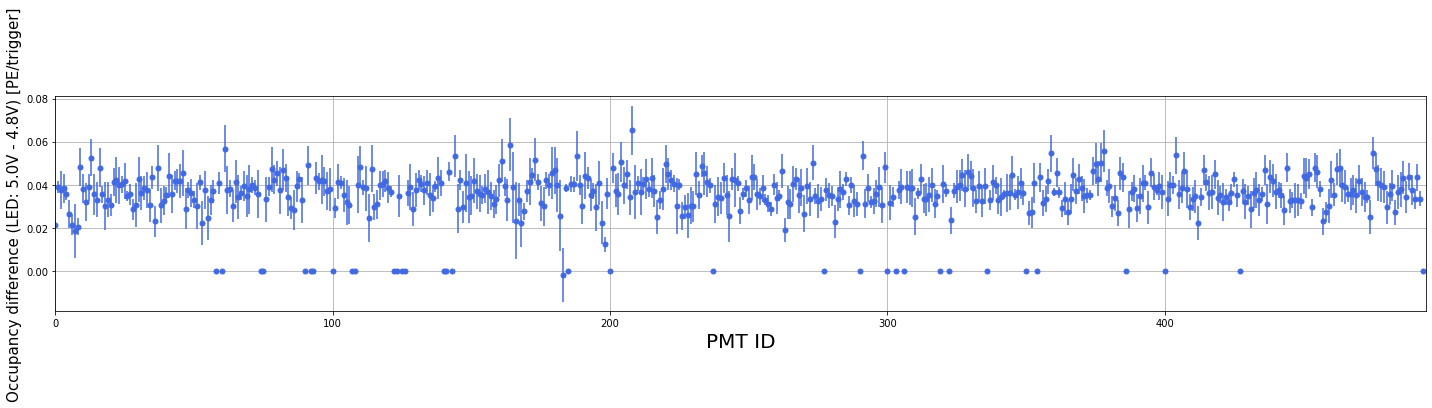

In [145]:
with initiate_plot(20, 5):
    plt.errorbar(channels, occupancy_diff, yerr=occupancy_diff_err, linestyle = '', fmt='o', markersize=5,
                color='royalblue', label='New Gain')
    #plt.title('Inner Top PMTs')
    plt.xlabel('PMT ID', fontsize=20)
    plt.ylabel('Occupancy difference (LED: 5.0V - 4.8V) [PE/trigger]', fontsize=15)
    #plt.ylim(-0.5,1)
    plt.xlim(0,494)
    #plt.legend()
    plt.grid()
    plt.tight_layout()
    #plt.savefig("gain_vs_PMT.png")

In [146]:
df1 = pd.read_hdf('table_4.0V.h5', 'table')
df2 = pd.read_hdf('table_4.2V.h5', 'table')
df3 = pd.read_hdf('table_4.4V.h5', 'table')
df4 = pd.read_hdf('table_4.6V.h5', 'table')
df5 = pd.read_hdf('table_4.8V.h5', 'table')
df6 = pd.read_hdf('table_5.0V.h5', 'table')

In [150]:
LED_voltage = [4.0, 4.2, 4.4, 4.6, 4.8, 5.0]

In [151]:
ave_occu=[]
ave_occu_err=[]

ave_occu.append(df1['occupancy'].mean())
ave_occu.append(df2['occupancy'].mean())
ave_occu.append(df3['occupancy'].mean())
ave_occu.append(df4['occupancy'].mean())
ave_occu.append(df5['occupancy'].mean())
ave_occu.append(df6['occupancy'].mean())

ave_occu_err.append(df1['occupancy'].std())
ave_occu_err.append(df2['occupancy'].std())
ave_occu_err.append(df3['occupancy'].std())
ave_occu_err.append(df4['occupancy'].std())
ave_occu_err.append(df5['occupancy'].std())
ave_occu_err.append(df6['occupancy'].std())


In [153]:
def fit_func(x, a, b):
    return a *x + b

In [154]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, LED_voltage, ave_occu, sigma=ave_occu_err)

In [155]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)


a = 0.20258726912772107 +/- 0.009242126486275313
b = -0.7784690408448748 +/- 0.038758930258193436


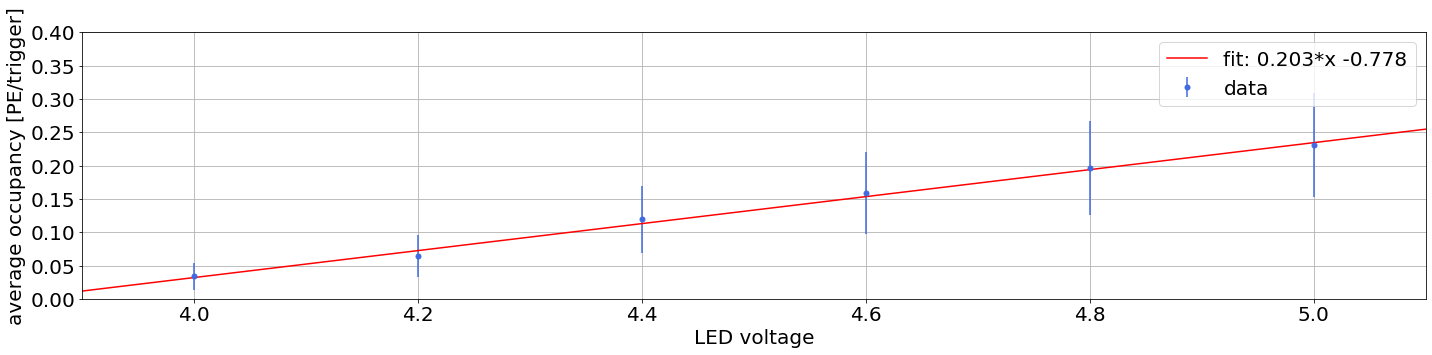

In [168]:
    plt.errorbar(LED_voltage, ave_occu, yerr=ave_occu_err, linestyle = '', fmt='o', markersize=5,
                color='royalblue', label='data')

    xfine = np.linspace(3,10, 100)  # define values to plot the function for
    fit_name = "fit: 0.203*x -0.778"
    plt.plot(xfine, fit_func(xfine, popt[0], popt[1]), 'r-', label=fit_name)

    #plt.title('Inner Top PMTs')
    plt.xlabel('LED voltage', fontsize=20)
    plt.ylabel('average occupancy [PE/trigger]', fontsize=20)
    plt.ylim(0,0.4)
    plt.xlim(3.9,5.1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.grid()
    plt.tight_layout()
    #plt.savefig("gain_vs_PMT.png")

In [169]:
0.203*5.0 - 0.778

0.2370000000000001